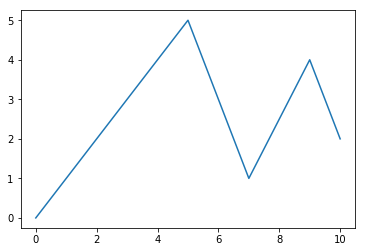

In [1]:
xs = [0, 5, 7, 9, 10]
ys = [0, 5, 1, 4, 2]

from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(xs,ys)

function seg = seglen(x0, x1, y0, y1)

xlen = (x0 - x1)^2 

ylen = (y0 - y1)^2

seg = (xlen + ylen)^0.5


In [4]:
import math

def seglen(x0, x1, y0, y1):
    xlen = (x0-x1)
    ylen = y0-y1
    lsq = xlen**2 + ylen**2
    return math.sqrt(lsq)

In [5]:
def totallength(xs, ys):
    tleng = 0
    i = 0
    while i <= len(xs) - 2:
        tleng = tleng + seglen(xs[i], xs[i+1], ys[i], ys[i+1])
        i = i + 1
    return (tleng)

def sinuosity_ratio(xs, ys):
    return totallength(xs, ys)/seglen(xs[0], xs[-1], ys[0], ys[-1])

print(sinuosity_ratio(xs,ys))


1.7047221503550825


In [7]:
from random import gauss

def dither(xs,std):
    gxs = []
    for i in range(len(xs)):
        gxs.append(xs[i]+gauss(0,std))
    return gxs
            
#print(dither(xs,1))    
    


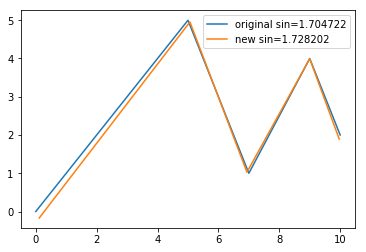

In [8]:
std = 0.1
plt.plot(xs,ys, label="original sin=%f"%sinuosity_ratio(xs, ys))
gxs = dither(xs,std)
gys = dither(ys,std)
plt.plot(gxs,gys, label="new sin=%f"%sinuosity_ratio(gxs, gys))
plt.legend()

In [13]:
def gsinuosity(xs,ys,std):
    gxs = dither(xs,std)
    gys = dither(ys,std)
    return sinuosity_ratio(gxs,gys)

def gsinrandm(xs,ys,std,N):
    sins = [ ]
    for i in range(N):
        sins.append(gsinuosity(xs,ys,std))
    return sins
    

In [44]:
std = 0.1
N = 1000

gsinratio = gsinuosity(xs,ys,std)
sins = gsinrandm(xs,ys,std, N)

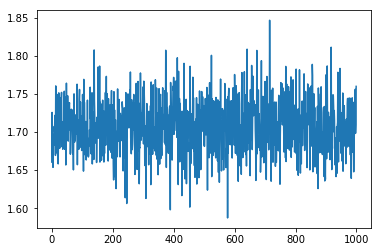

In [45]:
plt.plot(sins)

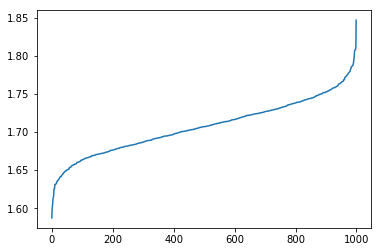

In [46]:
sins.sort()
plt.plot(sins)

In [47]:
from numpy import array, linspace
array(sins).mean()

1.7072899110034292

In [48]:
array(sins).std()

0.035729396464509927

In [49]:
std_min = 0
std_max = 0.5
std_no = 30

stds = linspace(std_min,std_max,std_no)
gmeans = [] 
gstds = []
for std in stds:
    sins = gsinrandm(xs,ys,std,N)
    gmeans.append(array(sins).mean())
    gstds.append(array(sins).std())


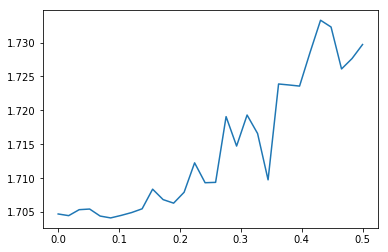

In [50]:
plt.plot(stds,gmeans)

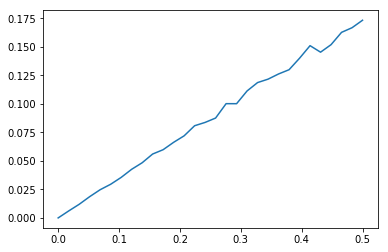

In [51]:
plt.plot(stds,gstds)


In [52]:
import scipy.stats

sins = gsinrandm(xs,ys,0.1,1000)
scipy.stats.mstats.normaltest(sins)

NormaltestResult(statistic=0.24441515115349161, pvalue=0.88496465238767852)

In [3]:
import shapefile
help(shapefile)


Help on module shapefile:

NAME
    shapefile

DESCRIPTION
    shapefile.py
    Provides read and write support for ESRI Shapefiles.
    author: jlawhead<at>geospatialpython.com
    version: 2.0.1
    Compatible with Python versions 2.7-3.x

CLASSES
    builtins.Exception(builtins.BaseException)
        ShapefileException
    builtins.object
        Reader
        Shape
        ShapeRecord
        Writer
    
    class Reader(builtins.object)
     |  Reads the three files of a shapefile as a unit or
     |  separately.  If one of the three files (.shp, .shx,
     |  .dbf) is missing no exception is thrown until you try
     |  to call a method that depends on that particular file.
     |  The .shx index file is used if available for efficiency
     |  but is not required to read the geometry from the .shp
     |  file. The "shapefile" argument in the constructor is the
     |  name of the file you want to open.
     |  
     |  You can instantiate a Reader without specifying a shapefil